<h3>Chicago Crimes Analysis</h3>
<img src='https://www.rsatravelinsurance.com/sites/rsatravelinsurance.com/files/chicago-landscape.jpg' />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DATASETS\\Chicago_Crimes.csv')
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [3]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [4]:
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mode()[0])
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mode()[0])
df['Location Description'] = df['Location Description'].fillna(df['Location Description'].mode()[0])
df['Community Area'] = df['Community Area'].fillna('unaccounted_community_area')
df['X Coordinate'] = df['X Coordinate'].fillna(df['X Coordinate'].mode()[0])
df['Y Coordinate'] = df['Y Coordinate'].fillna(df['Y Coordinate'].mode()[0])
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])

In [5]:
df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [6]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

In [7]:
df.dtypes

ID                         int64
Case Number             category
Date                    category
Block                   category
IUCR                    category
Primary Type            category
Description             category
Location Description    category
Arrest                      bool
Domestic                    bool
Beat                       int64
District                   int64
Ward                       int64
Community Area          category
FBI Code                category
X Coordinate             float64
Y Coordinate             float64
Year                       int64
Updated On              category
Latitude                 float64
Longitude                float64
Location                category
dtype: object

In [8]:
# Step 1: Convert to string only if not null
df['Date'] = df['Date'].astype(str)
# Step 2: Replace '/' with '-' safely
df['Date'] = df['Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
# Step 3: Strip whitespace
df['Date'] = df['Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)
# Step 4: Convert to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

df['Year'] = df['Date'].dt.year
df['Month'] =  df['Date'].dt.month
df['Day'] =  df['Date'].dt.day
df['DayOfWeek'] =  df['Date'].dt.dayofweek

crimes_per_year = df['Year'].value_counts().sort_index()
crimes_per_month = df['Month'].value_counts().sort_index()
crimes_per_day = df['DayOfWeek'].value_counts().sort_index()

<hr><h1>INSIGHTS</h1>

In [9]:
df.shape[0]

249123

<p>1. The total crimes at Chicago is 249123</p>
<hr>

<h3>Visual 1</h3>

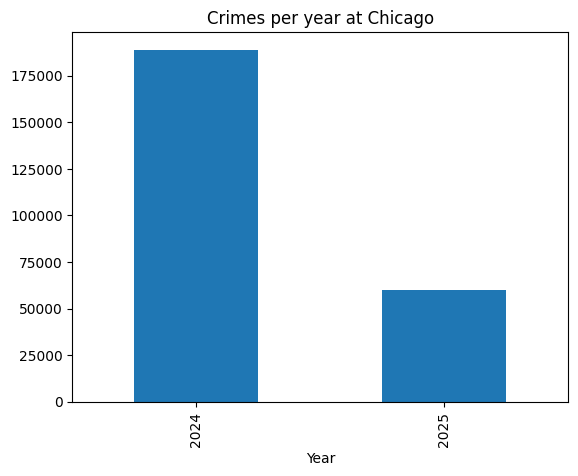

Year
2024    188918
2025     60205
Name: count, dtype: int64

In [10]:
df['Year'].value_counts().plot(kind = 'bar', title="Crimes per year at Chicago")
plt.show()
df['Year'].value_counts()

<p>2. Only 2024 and 2025 year types are in the data set
<br>3. In 2024 Chicago had almost 189k crimes, but in 2025 it went down a lot to around 60k crimes.</p>

<h3>Visual 2</h3>

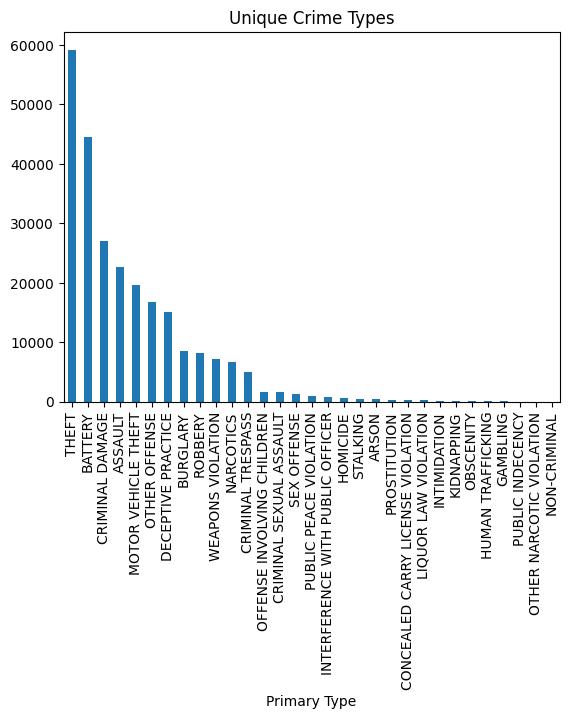

Primary Type
THEFT                  59201
BATTERY                44579
CRIMINAL DAMAGE        27094
ASSAULT                22615
MOTOR VEHICLE THEFT    19604
Name: count, dtype: int64

In [11]:
df["Primary Type"].value_counts().plot(kind="bar", title="Unique Crime Types")
plt.show()
df['Primary Type'].value_counts().head(5)

In [12]:
df['Primary Type'].value_counts().tail(5)

Primary Type
HUMAN TRAFFICKING           24
GAMBLING                    18
PUBLIC INDECENCY            13
OTHER NARCOTIC VIOLATION     7
NON-CRIMINAL                 4
Name: count, dtype: int64

<p>This shows the count of crime types, which has a total of 31 crime types.
<br>We can see the top 5 common crime types, which are Theft, Battery, Criminal Damage, Assault, and Motor Vehicle Theft
<br>and we can also see the least common crime types, which are Human Trafficking, Gambling, Public Indecency, Other Narcotic Violation, and Non-Criminal</p>
<hr>

<h3>Visual 3</h3>

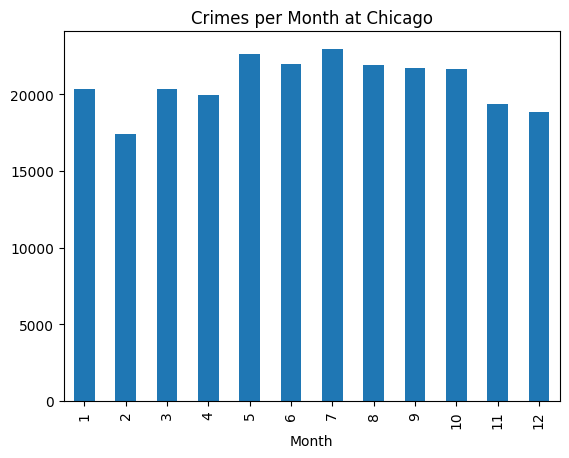

Month
7     22957
5     22633
6     21964
8     21911
9     21690
10    21656
1     20344
3     20342
4     19971
11    19389
12    18873
2     17393
Name: count, dtype: int64

In [13]:
df["Month"].value_counts().sort_index().plot(kind="bar", title="Crimes per Month at Chicago")
plt.show()
df["Month"].value_counts()

<p>The top 5 highest crime counts by month are July, May, June, August, and September
<br>Crimes were highest in July which is about 23,000 cases.
<br>The least 5 highest crime counts by month are February, December, November, April, and March
<br>Crimes were lowest in February which is around 17,000 cases.</p>

In [14]:
df.groupby("Month")["ID"].count().mean()

np.float64(20760.25)

<p>The average count of crimes by month is 20,760
<br>so Chicago crimes go up in summer months like May, June, July, and go down in winter months like November and December.</p>
<hr>

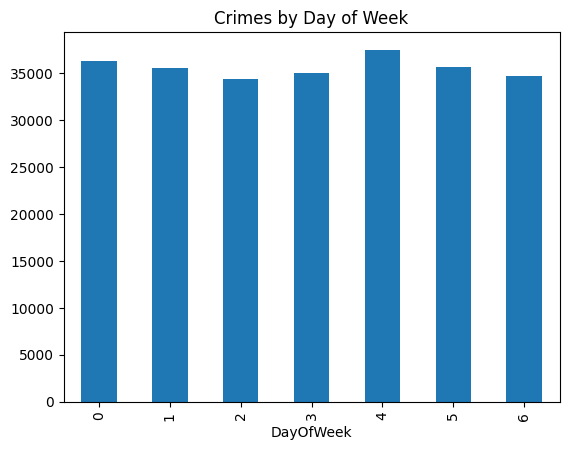

DayOfWeek
4    37498
0    36262
5    35666
1    35580
3    35007
6    34681
2    34429
Name: count, dtype: int64

In [15]:
df["DayOfWeek"].value_counts().sort_index().plot(kind="bar", title="Crimes by Day of Week")
plt.show()
df["DayOfWeek"].value_counts()

<p>The top 3 highest crime counts by Day of week are Friday, Monday, and Saturday
<br>Crimes were highest in Friday which is over 37,000 cases.
<br>The least 3 highest crime counts by Day of week are Wednesday, Sunday, and Thursday
<br>Crimes were lowest in Wednesday which is around 34,000 cases.</p>

In [16]:
df.groupby("DayOfWeek")["ID"].count().mean()

np.float64(35589.0)

<p>The average count of crimes by Day of week is 35,589
<br>The difference between highest and lowest day is about 3,000 crimes, showing crime is fairly steady across the week.
<br>so Crimes in Chicago almost same each day, but Day Friday has most crimes and Day Wednesday has least.</p>
<hr>

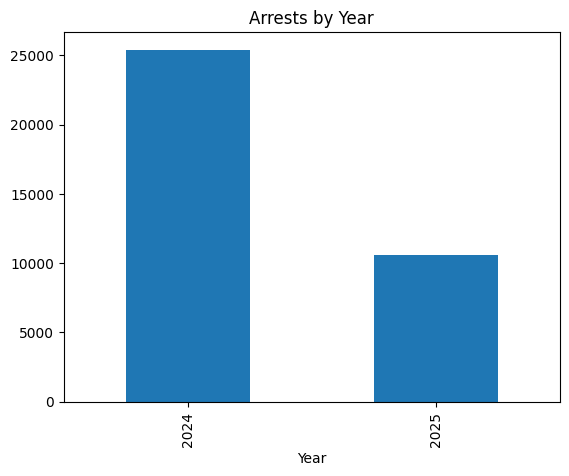

Year
2024    25417
2025    10585
Name: Arrest, dtype: int64

In [17]:
df.groupby("Year")["Arrest"].sum().plot(kind="bar", title="Arrests by Year")
plt.show()
df.groupby("Year")["Arrest"].sum()

In [18]:
df["Arrest"].sum()

np.int64(36002)

<p>Total count of arrest in the year 2024 and 2025 is 36,002
<br>Arrests in 2025 are much fewer than in 2024, it's less than half.</p>

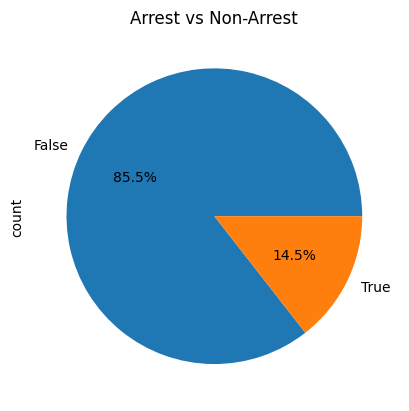

Arrest
False    213121
True      36002
Name: count, dtype: int64

In [19]:
df["Arrest"].value_counts().plot.pie(autopct="%1.1f%%", title="Arrest vs Non-Arrest")
plt.show()
df["Arrest"].value_counts()

<p>Non-Arrests (False): 213,121 cases = 85.5%
<br>Arrests (True): 36,002 cases = 14.5%
<br>Most crimes do not lead to arrests, 85.5% did not result in an arrest.
<br>Only 14.5% crimes lead to an arrest. The majority remain without an arrest</p>
<hr>

Arrest,False,True
Primary Type,,
ARSON,427,25
ASSAULT,20115,2500
BATTERY,36932,7647
BURGLARY,8027,416
CONCEALED CARRY LICENSE VIOLATION,3,246
CRIMINAL DAMAGE,25987,1107
CRIMINAL SEXUAL ASSAULT,1533,40
CRIMINAL TRESPASS,3569,1476
DECEPTIVE PRACTICE,14545,446


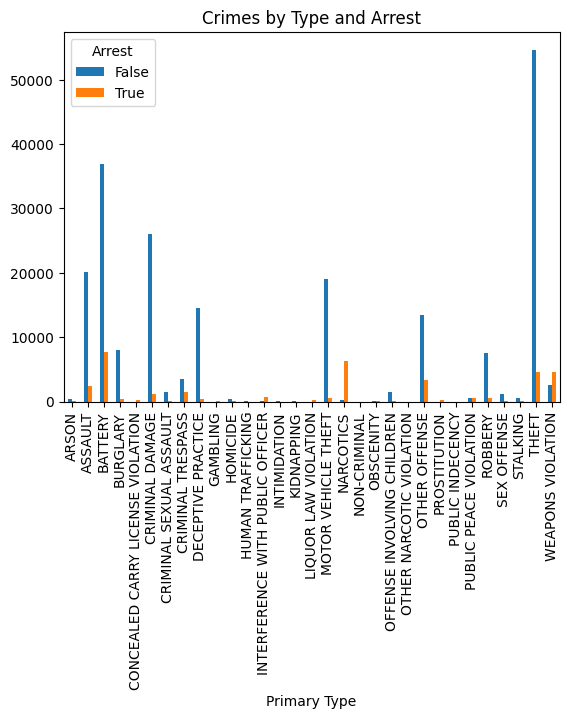

In [20]:
df.groupby(["Primary Type", "Arrest"]).size().unstack().plot(kind = 'bar', title = 'Crimes by Type and Arrest')
df.groupby(["Primary Type", "Arrest"]).size().unstack()

<p>Theft is the most common crime with more than 50,000 cases, but very few lead to arrests.
<br>Battery and assault are also very common crimes, and these types have more arrests compared to theft.
<br>Narcotics cases show a high number of arrests compared to other crimes
<br>Weapons violations also have a higher arrest rate
<br>so although Theft happens the most, but drug and weapon crimes are more likely to result in arrests</p>
<hr>

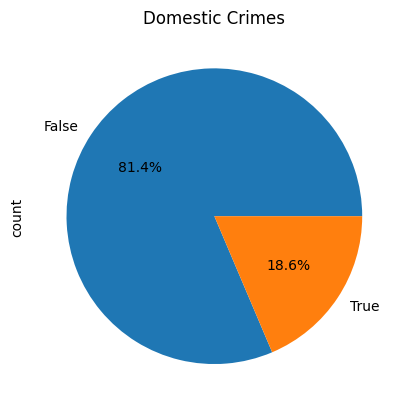

Domestic
False    202776
True      46347
Name: count, dtype: int64

In [21]:
df["Domestic"].value_counts().plot.pie(autopct="%1.1f%%", title="Domestic Crimes")
plt.show()
df["Domestic"].value_counts()

<p>Domestic/Non-Domestic Counts:
<br>Domestic (True): 46,347 cases
<br>Non-domestic (False): 202,776 cases
<br>
<br>Domestic crimes are fewer. Only 18.6% of crimes are marked as domestic.
<br>Most crimes are non-domestic. About 81.4% of crimes are not related to domestic cases.
<br>Most crimes in Chicago are not domestic-related, but domestic cases still make up a notable counts
<hr>

In [22]:
df['Location Description'].unique()
street = df[df['Location Description'] == 'STREET']

In [23]:
street_loc = list(zip(street['Latitude'], street['Longitude']))

m = folium.Map(street_loc=[street['Latitude'].mean(), street['Longitude'].mean()], zoom_start=10)

HeatMap(street_loc).add_to(m)

# Step 4: Save or display the map
m.save('street_heatmap.html')  # Save the map as an HTML file
m  # Display the map in a Jupyter Notebook

<p>This heatmap show the location of all Street Crimes</p>
<hr>

<Axes: xlabel='Location Description'>

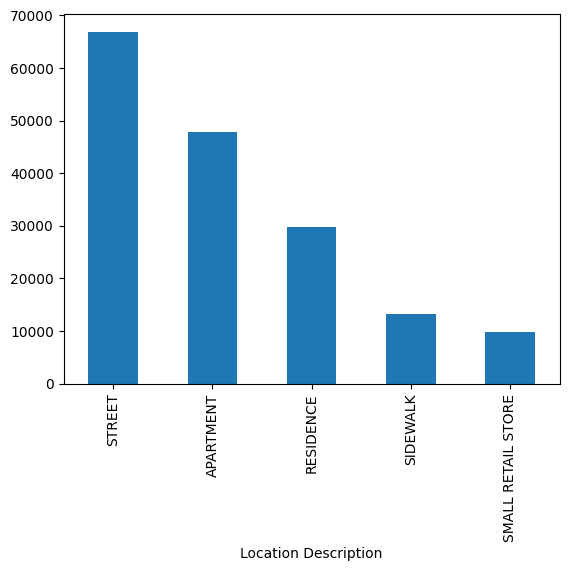

In [29]:
df["Location Description"].value_counts().head().plot(kind = 'bar')

<p>Street has the highest number of reported crimes, with over 60,000 incidents. 
<br>So, public spaces like streets are a major focus for criminal activity in Chicago.
<br>Sidewalks and Small Retail Stores represent the least frequent locations for crimes.
<br>Which may reflect their lower exposure or less crime activity in these spaces.</p>
<hr>

<Axes: xlabel='Primary Type'>

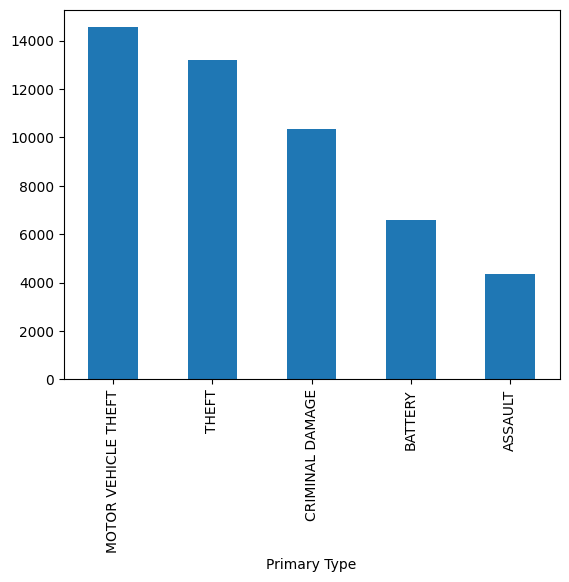

In [34]:
street["Primary Type"].value_counts().head().plot(kind = 'bar')

<p>Motor Vehicle Theft is the most common crime on streets, with over 14,000 incidents reported. 
<br>Theft is the second most frequent crime on streets, with more than 12,000 cases
<br>Battery comes next with around 5,000 reports
<br>Assault is the least reported crime in this set, with fewer than 4,000 incidents
<br>so, theft-related crimes (Motor Vehicle Theft and Theft) are the most common in Chicago, while assault and battery are reported less frequently</p>
<hr>

<Axes: title={'center': 'Street Crime Arrest Percentage'}, ylabel='count'>

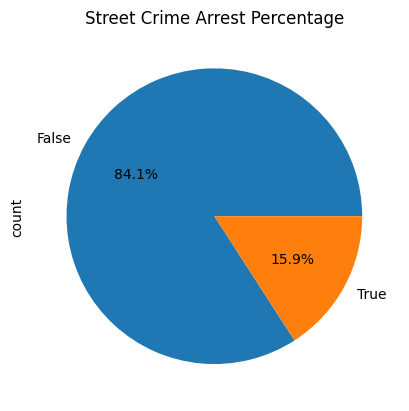

In [38]:
street["Arrest"].value_counts().head().plot(kind = 'pie', autopct="%1.1f%%", title="Street Crime Arrest Percentage")

<p>84.1% of street crime incidents did not result in an arrest. 
<br>Only 15.9% of the incidents led to an arrest.
<br>so, arrests are made in a small portion of street crime cases, with most incidents not resulting in an arrest.</p>
<hr>

In [39]:
df.dtypes

ID                               int64
Case Number                   category
Date                    datetime64[ns]
Block                         category
IUCR                          category
Primary Type                  category
Description                   category
Location Description          category
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                category
FBI Code                      category
X Coordinate                   float64
Y Coordinate                   float64
Year                             int32
Updated On                    category
Latitude                       float64
Longitude                      float64
Location                      category
Month                            int32
Day                              int32
DayOfWeek                        int32
dtype: object

Arrest
False    19061
True       543
Name: count, dtype: int64

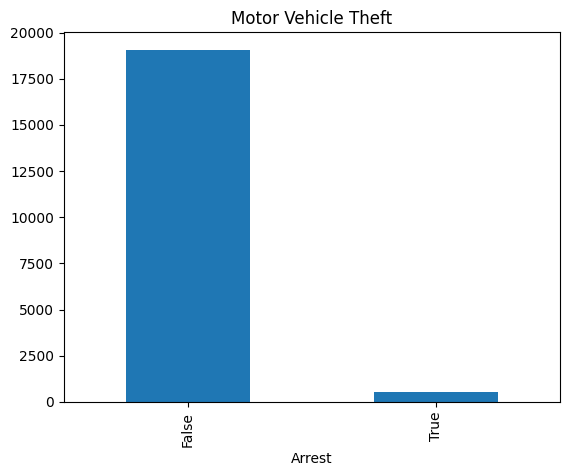

In [44]:
mvt = df[df['Primary Type'] == 'MOTOR VEHICLE THEFT']
mvt["Arrest"].value_counts().head().plot(kind = 'bar', title = 'Motor Vehicle Theft')
mvt["Arrest"].value_counts()

<p>The vast majority of Motor Vehicle Theft incidents did not result in an arrest. Around 19k crimes.
<br>A very small number of Motor Vehicle Theft cases around 543 led to an arrest.
<br>so, arrests for motor vehicle theft are rare, with most cases not leading to an arrest.</p>
<hr>